In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [5]:
%load_ext autoreload
%autoreload 2

In [3]:
PREDICTIONS_PATH = "/data/ltorres/predictions"

---

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
df_random = pd.read_csv(os.path.join(PREDICTIONS_PATH, "predictions_random.csv"))
df_stratified = pd.read_csv(os.path.join(PREDICTIONS_PATH, "predictions_stratified.csv"))
df_centroid = pd.read_csv(os.path.join(PREDICTIONS_PATH, "predictions_centroid.csv"))

In [14]:
cm_random = confusion_matrix(df_random['targets'], df_random['predictions'])
cm_stratified = confusion_matrix(df_stratified['targets'], df_stratified['predictions'])
cm_centroid = confusion_matrix(df_centroid['targets'], df_centroid['predictions'])

In [34]:
def normalized_matrix(conf_matrix):
    labels = ["cumulus", "altocumulus", "cirrus", "clearsky", "stratocumulus", "cumulonimbus", "mixed"]
    
    matrix = (conf_matrix/np.sum(conf_matrix, axis=1).reshape(-1,1))
    
    return pd.DataFrame(data=matrix, index=labels, columns=labels)

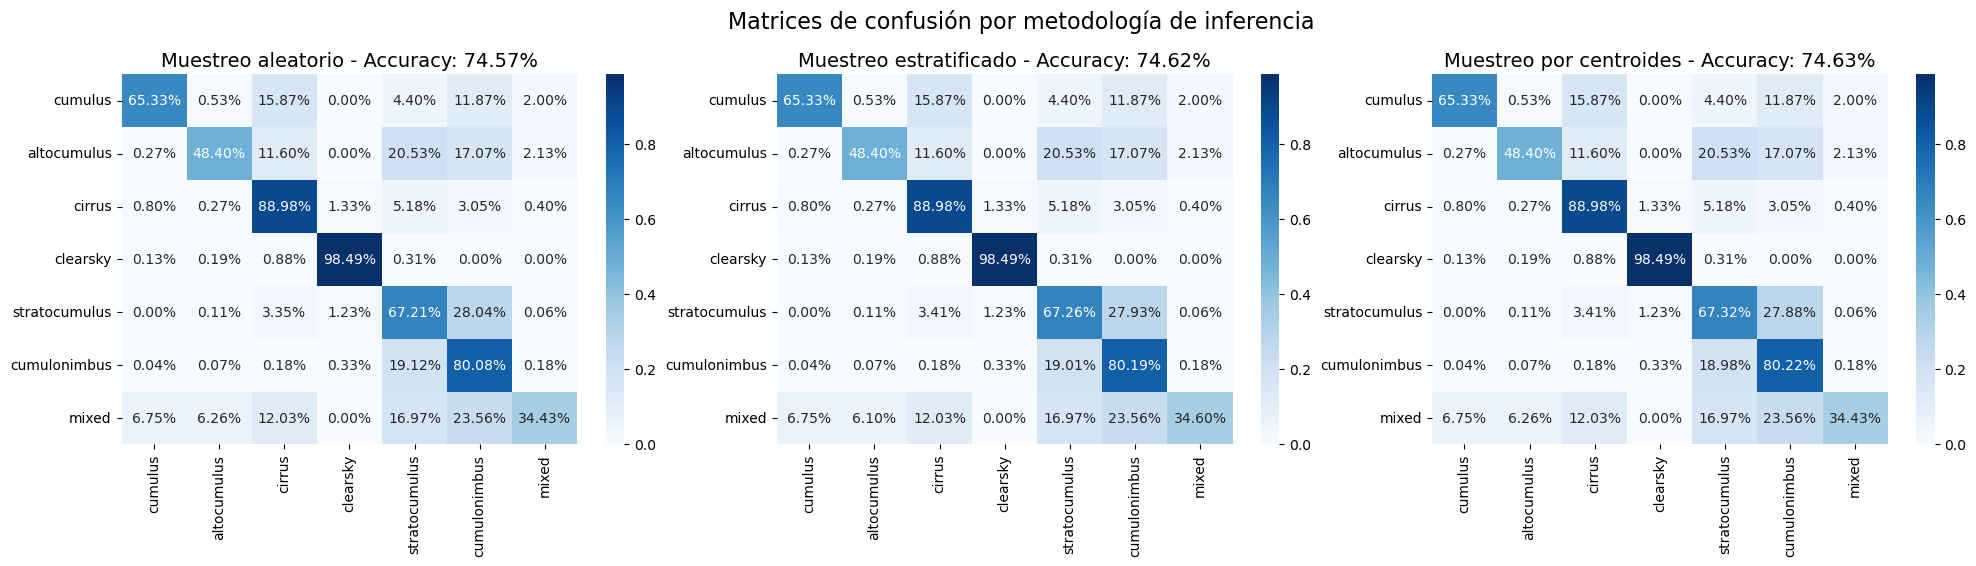

In [67]:
fig, axs = plt.subplots(1,3, dpi=100)
fig.set_figwidth(20)
fig.set_figheight(5)

fig.suptitle(r"Matrices de confusión por metodología de inferencia", fontsize=16)

random_acc = accuracy_score(df_random['targets'], df_random['predictions'])
axs[0].set_title(f"Muestreo aleatorio - Accuracy: {random_acc:.2%}", fontsize=14)
sns.heatmap(normalized_matrix(cm_random), annot=True, fmt='.2%', cmap='Blues', ax=axs[0])

stratified_acc = accuracy_score(df_stratified['targets'], df_stratified['predictions'])
axs[1].set_title(f"Muestreo estratificado - Accuracy: {stratified_acc:.2%}", fontsize=14)
sns.heatmap(normalized_matrix(cm_stratified), annot=True, fmt='.2%', cmap='Blues', ax=axs[1])


centroid_acc = accuracy_score(df_centroid['targets'], df_centroid['predictions'])
axs[2].set_title(f"Muestreo por centroides - Accuracy: {centroid_acc:.2%}", fontsize=14)
sns.heatmap(normalized_matrix(cm_centroid), annot=True, fmt='.2%', cmap='Blues', ax=axs[2])


plt.subplots_adjust(left=0.05,
                    bottom=0.11, 
                    right=1-0.01, 
                    top=0.85, 
                    wspace=0.15, 
                    hspace=0)

plt.show()


0.7456666666666667


<AxesSubplot:>

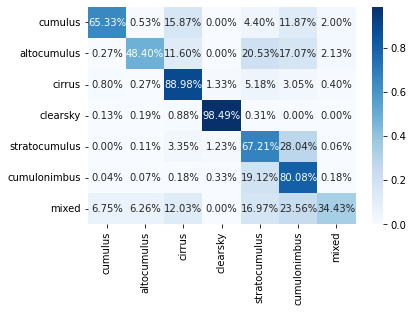

In [51]:
print(accuracy_score(df_random['targets'], df_random['predictions']))
sns.heatmap(normalized_matrix(cm_random), annot=True, fmt='.2%', cmap='Blues')